# Source

- Link to competition: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

- Link to solution: https://www.kaggle.com/code/rikdifos/credit-card-approval-prediction-using-ml

# Setup

In [1]:
# Install Kaggle API
!pip install kaggle

# Export Kaggle username and token to the environment
# See https://github.com/Kaggle/kaggle-api for details
%env KAGGLE_USERNAME=larryli86
%env KAGGLE_KEY=9fe3c6ba762f2ef972819bba852af3fa

# Delete files if exist
!rm -rf input credit-card-approval-prediction.zip sample_data output

# Create output directory
!mkdir output

# Download input data
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

env: KAGGLE_USERNAME=larryli86
env: KAGGLE_KEY=9fe3c6ba762f2ef972819bba852af3fa
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 109MB/s]


In [2]:
# Unzip the input data file into '/content/input'
!unzip /content/credit-card-approval-prediction.zip -d input

Archive:  /content/credit-card-approval-prediction.zip
  inflating: input/application_record.csv  
  inflating: input/credit_record.csv  


# Run Code

<font size=5 >Credit Card Approval Prediction Using Sklearn</font>

<h1>Table of Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Response-Variable" data-toc-modified-id="Response-Variable-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Response Variable</a></span></li><li><span><a href="#Features" data-toc-modified-id="Features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Features</a></span><ul class="toc-item"><li><span><a href="#Binary-Features" data-toc-modified-id="Binary-Features-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Binary Features</a></span><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#Having-a-car-or-not" data-toc-modified-id="Having-a-car-or-not-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Having a car or not</a></span></li><li><span><a href="#Having-house-reality-or-not" data-toc-modified-id="Having-house-reality-or-not-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Having house reality or not</a></span></li><li><span><a href="#Having-a-phone-or-not" data-toc-modified-id="Having-a-phone-or-not-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Having a phone or not</a></span></li><li><span><a href="#Having-an-email-or-not" data-toc-modified-id="Having-an-email-or-not-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Having an email or not</a></span></li><li><span><a href="#Having-a-Work-Phone-or-not" data-toc-modified-id="Having-a-Work-Phone-or-not-1.2.1.6"><span class="toc-item-num">1.2.1.6&nbsp;&nbsp;</span>Having a Work Phone or not</a></span></li></ul></li><li><span><a href="#Continuous-Variables" data-toc-modified-id="Continuous-Variables-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Continuous Variables</a></span><ul class="toc-item"><li><span><a href="#Children-Numbers" data-toc-modified-id="Children-Numbers-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Children Numbers</a></span></li><li><span><a href="#Annual-Income" data-toc-modified-id="Annual-Income-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Annual Income</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Working-Years" data-toc-modified-id="Working-Years-1.2.2.4"><span class="toc-item-num">1.2.2.4&nbsp;&nbsp;</span>Working Years</a></span></li><li><span><a href="#Famliy-Size" data-toc-modified-id="Famliy-Size-1.2.2.5"><span class="toc-item-num">1.2.2.5&nbsp;&nbsp;</span>Famliy Size</a></span></li></ul></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Categorical Features</a></span><ul class="toc-item"><li><span><a href="#Income-Type" data-toc-modified-id="Income-Type-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Income Type</a></span></li><li><span><a href="#Occupation-Type" data-toc-modified-id="Occupation-Type-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Occupation Type</a></span></li><li><span><a href="#House-Type" data-toc-modified-id="House-Type-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>House Type</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-1.2.3.4"><span class="toc-item-num">1.2.3.4&nbsp;&nbsp;</span>Education</a></span></li><li><span><a href="#Marriage-Condition" data-toc-modified-id="Marriage-Condition-1.2.3.5"><span class="toc-item-num">1.2.3.5&nbsp;&nbsp;</span>Marriage Condition</a></span></li></ul></li></ul></li><li><span><a href="#IV、WOE：Concept-and-Application" data-toc-modified-id="IV、WOE：Concept-and-Application-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>IV、WOE：Concept and Application</a></span></li></ul></li><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Algorithms</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Xgboost</a></span></li><li><span><a href="#Keras-Neural-Networks" data-toc-modified-id="Keras-Neural-Networks-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Keras Neural Networks</a></span></li></ul></li></ul></div>

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings

warnings.filterwarnings("ignore")
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

np.random.seed(123)

In [4]:
data = pd.read_csv("input/application_record.csv", encoding="utf-8")
record = pd.read_csv("input/credit_record.csv", encoding="utf-8")

In [5]:
plt.rcParams["figure.facecolor"] = "white"

# Feature Engineering

## Response Variable

In [6]:
# find all users' account open month.
begin_month = pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month = begin_month.rename(columns={"MONTHS_BALANCE": "begin_month"})
new_data = pd.merge(data, begin_month, how="left", on="ID")  # merge to record data

Generally, users in risk should be in 3%, thus I choose users who overdue for more than 60 days as target risk users. Those samples are marked as '1', else are '0'.

In [7]:
record["dep_value"] = None
record["dep_value"][record["STATUS"] == "2"] = "Yes"
record["dep_value"][record["STATUS"] == "3"] = "Yes"
record["dep_value"][record["STATUS"] == "4"] = "Yes"
record["dep_value"][record["STATUS"] == "5"] = "Yes"

In [8]:
cpunt = record.groupby("ID").count()
cpunt["dep_value"][cpunt["dep_value"] > 0] = "Yes"
cpunt["dep_value"][cpunt["dep_value"] == 0] = "No"
cpunt = cpunt[["dep_value"]]
new_data = pd.merge(new_data, cpunt, how="inner", on="ID")
new_data["target"] = new_data["dep_value"]
new_data.loc[new_data["target"] == "Yes", "target"] = 1
new_data.loc[new_data["target"] == "No", "target"] = 0

In [9]:
print(cpunt["dep_value"].value_counts())
cpunt["dep_value"].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

## Features

+ rename 

In [10]:
new_data.rename(columns={"CODE_GENDER": "Gender", "FLAG_OWN_CAR": "Car", "FLAG_OWN_REALTY": "Reality", "CNT_CHILDREN": "ChldNo", "AMT_INCOME_TOTAL": "inc", "NAME_EDUCATION_TYPE": "edutp", "NAME_FAMILY_STATUS": "famtp", "NAME_HOUSING_TYPE": "houtp", "FLAG_EMAIL": "email", "NAME_INCOME_TYPE": "inctp", "FLAG_WORK_PHONE": "wkphone", "FLAG_PHONE": "phone", "CNT_FAM_MEMBERS": "famsize", "OCCUPATION_TYPE": "occyp"}, inplace=True)

In [11]:
new_data.dropna()
new_data = new_data.mask(new_data == "NULL").dropna()

In [12]:
ivtable = pd.DataFrame(new_data.columns, columns=["variable"])
ivtable["IV"] = None
namelist = ["FLAG_MOBIL", "begin_month", "dep_value", "target", "ID"]

for i in namelist:
    ivtable.drop(ivtable[ivtable["variable"] == i].index, inplace=True)

+ Define `calc_iv` function to [calculate](https://www.kaggle.com/puremath86/iv-woe-starter-for-python) Information Value and WOE Value

### Binary Features

In [13]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 0)].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])  # Variable  # Value  # All  # Good (think: Fraud == 0)  # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=["Variable", "Value", "All", "Good", "Bad"])
    data["Share"] = data["All"] / data["All"].sum()
    data["Bad Rate"] = data["Bad"] / data["All"]
    data["Distribution Good"] = (data["All"] - data["Bad"]) / (data["All"].sum() - data["Bad"].sum())
    data["Distribution Bad"] = data["Bad"] / data["Bad"].sum()
    data["WoE"] = np.log(data["Distribution Good"] / data["Distribution Bad"])

    data = data.replace({"WoE": {np.inf: 0, -np.inf: 0}})

    data["IV"] = data["WoE"] * (data["Distribution Good"] - data["Distribution Bad"])

    data = data.sort_values(by=["Variable", "Value"], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print("IV = ", data["IV"].sum())

    iv = data["IV"].sum()
    print("This variable's IV is:", iv)
    print(df[feature].value_counts())
    return iv, data

In [14]:
def convert_dummy(df, feature, rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + "_" + str(mode)
    pos.drop([biggest], axis=1, inplace=True)
    df.drop([feature], axis=1, inplace=True)
    df = df.join(pos)
    return df

In [15]:
def get_category(df, col, binsnum, labels, qcut=False):
    if qcut:
        localdf = pd.qcut(df[col], q=binsnum, labels=labels)  # quantile cut
    else:
        localdf = pd.cut(df[col], bins=binsnum, labels=labels)  # equal-length cut

    localdf = pd.DataFrame(localdf)
    name = "gp" + "_" + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Gender

In [17]:
new_data["Gender"] = new_data["Gender"].replace(["F", "M"], [0, 1])
print(new_data["Gender"].value_counts())
iv, data = calc_iv(new_data, "Gender", "target")
ivtable.loc[ivtable["variable"] == "Gender", "IV"] = iv
data.head()

0    15630
1     9504
Name: Gender, dtype: int64
This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,15630,15400,230,0.621867,0.014715,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,9312,192,0.378133,0.020202,0.376821,0.454976,-0.188475,0.014730


#### Having a car or not

In [18]:
new_data["Car"] = new_data["Car"].replace(["N", "Y"], [0, 1])
print(new_data["Car"].value_counts())
iv, data = calc_iv(new_data, "Car", "target")
ivtable.loc[ivtable["variable"] == "Car", "IV"] = iv
data.head()

0    14618
1    10516
Name: Car, dtype: int64
This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,14618,14373,245,0.581603,0.016760,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,10339,177,0.418397,0.016831,0.41838,0.419431,-0.00251,0.000003


#### Having house reality or not

In [19]:
new_data["Reality"] = new_data["Reality"].replace(["N", "Y"], [0, 1])
print(new_data["Reality"].value_counts())
iv, data = calc_iv(new_data, "Reality", "target")
ivtable.loc[ivtable["variable"] == "Reality", "IV"] = iv
data.head()

1    16461
0     8673
Name: Reality, dtype: int64
This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Reality, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Reality,0,8673,8494,179,0.34507,0.020639,0.34372,0.424171,-0.210309,0.016920
1,Reality,1,16461,16218,243,0.65493,0.014762,0.65628,0.575829,0.130777,0.010521


#### Having a phone or not

In [20]:
new_data["phone"] = new_data["phone"].astype(str)
print(new_data["phone"].value_counts(normalize=True, sort=False))
new_data.drop(new_data[new_data["phone"] == "nan"].index, inplace=True)
iv, data = calc_iv(new_data, "phone", "target")
ivtable.loc[ivtable["variable"] == "phone", "IV"] = iv
data.head()

0    0.707209
1    0.292791
Name: phone, dtype: float64
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,17775,17481,294,0.707209,0.016540,0.707389,0.696682,0.015251,0.000163
1,phone,1,7359,7231,128,0.292791,0.017394,0.292611,0.303318,-0.035937,0.000385


#### Having an email or not

In [21]:
print(new_data["email"].value_counts(normalize=True, sort=False))
new_data["email"] = new_data["email"].astype(str)
iv, data = calc_iv(new_data, "email", "target")
ivtable.loc[ivtable["variable"] == "email", "IV"] = iv
data.head()

0    0.89934
1    0.10066
Name: email, dtype: float64
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,22604,22225,379,0.89934,0.016767,0.899361,0.898104,0.001398,0.000002
1,email,1,2530,2487,43,0.10066,0.016996,0.100639,0.101896,-0.012407,0.000016


#### Having a Work Phone or not

In [22]:
new_data["wkphone"] = new_data["wkphone"].astype(str)
iv, data = calc_iv(new_data, "wkphone", "target")
new_data.drop(new_data[new_data["wkphone"] == "nan"].index, inplace=True)
ivtable.loc[ivtable["variable"] == "wkphone", "IV"] = iv
data.head()

This variable's IV is: 0.002042429795148461
0    18252
1     6882
Name: wkphone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,wkphone,0,18252,17954,298,0.726188,0.016327,0.72653,0.706161,0.028436,0.000579
1,wkphone,1,6882,6758,124,0.273812,0.018018,0.27347,0.293839,-0.071838,0.001463


### Continuous Variables

#### Children Numbers

In [23]:
new_data.loc[new_data["ChldNo"] >= 2, "ChldNo"] = "2More"
print(new_data["ChldNo"].value_counts(sort=False))

0        15908
2More     3108
1         6118
Name: ChldNo, dtype: int64


In [24]:
iv, data = calc_iv(new_data, "ChldNo", "target")
ivtable.loc[ivtable["variable"] == "ChldNo", "IV"] = iv
data.head()

This variable's IV is: 0.0011214542503301935
0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,ChldNo,0,15908,15635,273,0.632928,0.017161,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,6021,97,0.243415,0.015855,0.243647,0.229858,0.058259,0.000803
2,ChldNo,2More,3108,3056,52,0.123657,0.016731,0.123665,0.123223,0.003580,0.000002


In [25]:
new_data = convert_dummy(new_data, "ChldNo")

#### Annual Income
bins the data based on sample quantiles

(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: inc, dtype: int64


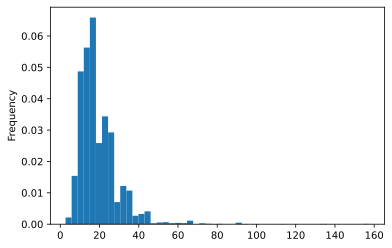

In [26]:
new_data["inc"] = new_data["inc"].astype(object)
new_data["inc"] = new_data["inc"] / 10000
print(new_data["inc"].value_counts(bins=10, sort=False))
new_data["inc"].plot(kind="hist", bins=50, density=True)

In [27]:
new_data = get_category(new_data, "inc", 3, ["low", "medium", "high"], qcut=True)
iv, data = calc_iv(new_data, "gp_inc", "target")
ivtable.loc[ivtable["variable"] == "inc", "IV"] = iv
data.head()

This variable's IV is: 0.0024219962221596752
low       8996
high      8244
medium    7894
Name: gp_inc, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_inc,high,8244,8096,148,0.328002,0.017952,0.327614,0.350711,-0.068126,0.001573
1,gp_inc,low,8996,8849,147,0.357922,0.016341,0.358085,0.348341,0.027588,0.000269
2,gp_inc,medium,7894,7767,127,0.314077,0.016088,0.314301,0.300948,0.043413,0.000580


In [28]:
new_data = convert_dummy(new_data, "gp_inc")

#### Age
Bucketing Continuous Variables

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


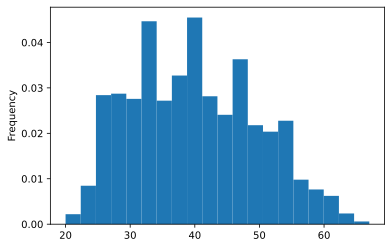

In [29]:
new_data["Age"] = -(new_data["DAYS_BIRTH"]) // 365
print(new_data["Age"].value_counts(bins=10, normalize=True, sort=False))
new_data["Age"].plot(kind="hist", bins=20, density=True)

In [30]:
new_data = get_category(new_data, "Age", 5, ["lowest", "low", "medium", "high", "highest"])
iv, data = calc_iv(new_data, "gp_Age", "target")
ivtable.loc[ivtable["variable"] == "DAYS_BIRTH", "IV"] = iv
data.head()

This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,4414,4323,91,0.175619,0.020616,0.174935,0.215640,-0.209194,0.008515
1,gp_Age,highest,993,989,4,0.039508,0.004028,0.040021,0.009479,1.440361,0.043992
2,gp_Age,low,7806,7686,120,0.310575,0.015373,0.311023,0.284360,0.089625,0.002390
3,gp_Age,lowest,4005,3921,84,0.159346,0.020974,0.158668,0.199052,-0.226754,0.009157
4,gp_Age,medium,7916,7793,123,0.314952,0.015538,0.315353,0.291469,0.078758,0.001881


In [31]:
pd.cut(new_data["Age"], 5)

2          (57.6, 67.0]
3          (48.2, 57.6]
4          (48.2, 57.6]
5          (48.2, 57.6]
6          (48.2, 57.6]
              ...      
36452      (38.8, 48.2]
36453      (29.4, 38.8]
36454      (29.4, 38.8]
36455      (48.2, 57.6]
36456    (19.953, 29.4]
Name: Age, Length: 25134, dtype: category
Categories (5, interval[float64, right]): [(19.953, 29.4] < (29.4, 38.8] < (38.8, 48.2] <
                                           (48.2, 57.6] < (57.6, 67.0]]

In [32]:
new_data = convert_dummy(new_data, "gp_Age")

#### Working Years
+ Equal-length Bucketing

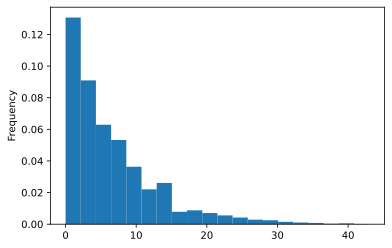

In [33]:
new_data["worktm"] = -(new_data["DAYS_EMPLOYED"]) // 365
new_data[new_data["worktm"] < 0] = np.nan  # replace by na
new_data["DAYS_EMPLOYED"]
new_data["worktm"].fillna(new_data["worktm"].mean(), inplace=True)  # replace na by mean
new_data["worktm"].plot(kind="hist", bins=20, density=True)

In [34]:
new_data = get_category(new_data, "worktm", 5, ["lowest", "low", "medium", "high", "highest"])
iv, data = calc_iv(new_data, "gp_worktm", "target")
ivtable.loc[ivtable["variable"] == "DAYS_EMPLOYED", "IV"] = iv
data.head()

This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_worktm,high,425,423,2,0.016909,0.004706,0.017117,0.004739,1.284186,0.015895
1,gp_worktm,highest,90,90,0,0.003581,0.000000,0.003642,0.000000,0.000000,0.000000
2,gp_worktm,low,4987,4921,66,0.198416,0.013234,0.199134,0.156398,0.241573,0.010324
3,gp_worktm,lowest,18254,17916,338,0.726267,0.018516,0.724992,0.800948,-0.099635,0.007568
4,gp_worktm,medium,1378,1362,16,0.054826,0.011611,0.055115,0.037915,0.374082,0.006434


In [35]:
new_data = convert_dummy(new_data, "gp_worktm")

#### Famliy Size

In [36]:
new_data["famsize"].value_counts(sort=False)

2.0     12697
1.0      4263
5.0       307
3.0      5216
4.0      2576
6.0        51
15.0        3
7.0        18
20.0        1
9.0         2
Name: famsize, dtype: int64

In [37]:
new_data["famsize"] = new_data["famsize"].astype(int)
new_data["famsizegp"] = new_data["famsize"]
new_data["famsizegp"] = new_data["famsizegp"].astype(object)
new_data.loc[new_data["famsizegp"] >= 3, "famsizegp"] = "3more"
iv, data = calc_iv(new_data, "famsizegp", "target")
ivtable.loc[ivtable["variable"] == "famsize", "IV"] = iv
data.head()

This variable's IV is: 0.006156138510778323
2        12697
3more     8174
1         4263
Name: famsizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famsizegp,1,4263,4179,84,0.169611,0.019704,0.169108,0.199052,-0.163028,0.004882
1,famsizegp,2,12697,12489,208,0.505172,0.016382,0.505382,0.492891,0.025027,0.000313
2,famsizegp,3more,8174,8044,130,0.325217,0.015904,0.325510,0.308057,0.055108,0.000962


In [38]:
new_data = convert_dummy(new_data, "famsizegp")

### Categorical Features

#### Income Type

In [39]:
print(new_data["inctp"].value_counts(sort=False))
print(new_data["inctp"].value_counts(normalize=True, sort=False))
new_data.loc[new_data["inctp"] == "Pensioner", "inctp"] = "State servant"
new_data.loc[new_data["inctp"] == "Student", "inctp"] = "State servant"
iv, data = calc_iv(new_data, "inctp", "target")
ivtable.loc[ivtable["variable"] == "inctp", "IV"] = iv
data.head()

Working                 15622
Commercial associate     7052
State servant            2437
Student                    10
Pensioner                  13
Name: inctp, dtype: int64
Working                 0.621549
Commercial associate    0.280576
State servant           0.096960
Student                 0.000398
Pensioner               0.000517
Name: inctp, dtype: float64
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,inctp,Commercial associate,7052,6933,119,0.280576,0.016875,0.280552,0.281991,-0.005115,0.000007
1,inctp,State servant,2460,2418,42,0.097875,0.017073,0.097847,0.099526,-0.017013,0.000029
2,inctp,Working,15622,15361,261,0.621549,0.016707,0.621601,0.618483,0.005028,0.000016


In [40]:
new_data = convert_dummy(new_data, "inctp")

#### Occupation Type

In [41]:
new_data.loc[(new_data["occyp"] == "Cleaning staff") | (new_data["occyp"] == "Cooking staff") | (new_data["occyp"] == "Drivers") | (new_data["occyp"] == "Laborers") | (new_data["occyp"] == "Low-skill Laborers") | (new_data["occyp"] == "Security staff") | (new_data["occyp"] == "Waiters/barmen staff"), "occyp"] = "Laborwk"
new_data.loc[(new_data["occyp"] == "Accountants") | (new_data["occyp"] == "Core staff") | (new_data["occyp"] == "HR staff") | (new_data["occyp"] == "Medicine staff") | (new_data["occyp"] == "Private service staff") | (new_data["occyp"] == "Realty agents") | (new_data["occyp"] == "Sales staff") | (new_data["occyp"] == "Secretaries"), "occyp"] = "officewk"
new_data.loc[(new_data["occyp"] == "Managers") | (new_data["occyp"] == "High skill tech staff") | (new_data["occyp"] == "IT staff"), "occyp"] = "hightecwk"
print(new_data["occyp"].value_counts())
iv, data = calc_iv(new_data, "occyp", "target")
ivtable.loc[ivtable["variable"] == "occyp", "IV"] = iv
data.head()

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occyp,Laborwk,10496,10311,185,0.417602,0.017626,0.417247,0.438389,-0.049428,0.001045
1,occyp,hightecwk,4455,4375,80,0.177250,0.017957,0.177039,0.189573,-0.068404,0.000857
2,occyp,officewk,10183,10026,157,0.405148,0.015418,0.405714,0.372038,0.086652,0.002918


In [42]:
new_data = convert_dummy(new_data, "occyp")

#### House Type

In [43]:
iv, data = calc_iv(new_data, "houtp", "target")
ivtable.loc[ivtable["variable"] == "houtp", "IV"] = iv
data.head()

This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,houtp,Co-op apartment,152,149,3,0.006048,0.019737,0.006029,0.007109,-0.164705,0.000178
1,houtp,House / apartment,22102,21738,364,0.879367,0.016469,0.879654,0.862559,0.019624,0.000335
2,houtp,Municipal apartment,812,793,19,0.032307,0.023399,0.032090,0.045024,-0.338655,0.004380
3,houtp,Office apartment,199,194,5,0.007918,0.025126,0.007850,0.011848,-0.411619,0.001646
4,houtp,Rented apartment,439,433,6,0.017466,0.013667,0.017522,0.014218,0.208939,0.000690


In [44]:
new_data = convert_dummy(new_data, "houtp")

#### Education

In [45]:
new_data.loc[new_data["edutp"] == "Academic degree", "edutp"] = "Higher education"
iv, data = calc_iv(new_data, "edutp", "target")
ivtable.loc[ivtable["variable"] == "edutp", "IV"] = iv
data.head()

This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edutp,Higher education,7146,7018,128,0.284316,0.017912,0.283992,0.303318,-0.065836,0.001272
1,edutp,Incomplete higher,993,972,21,0.039508,0.021148,0.039333,0.049763,-0.235206,0.002453
2,edutp,Lower secondary,187,181,6,0.007440,0.032086,0.007324,0.014218,-0.663301,0.004573
3,edutp,Secondary / secondary special,16808,16541,267,0.668736,0.015885,0.669351,0.632701,0.056310,0.002064


In [46]:
new_data = convert_dummy(new_data, "edutp")

####  Marriage Condition

In [47]:
new_data["famtp"].value_counts(normalize=True, sort=False)

Married                 0.696626
Single / not married    0.137065
Civil marriage          0.084865
Separated               0.058367
Widow                   0.023076
Name: famtp, dtype: float64

In [48]:
iv, data = calc_iv(new_data, "famtp", "target")
ivtable.loc[ivtable["variable"] == "famtp", "IV"] = iv
data.head()

This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famtp,Civil marriage,2133,2101,32,0.084865,0.015002,0.085019,0.075829,0.114394,0.001051
1,famtp,Married,17509,17232,277,0.696626,0.015820,0.697313,0.656398,0.060467,0.002474
2,famtp,Separated,1467,1452,15,0.058367,0.010225,0.058757,0.035545,0.502608,0.011666
3,famtp,Single / not married,3445,3362,83,0.137065,0.024093,0.136047,0.196682,-0.368588,0.022349
4,famtp,Widow,580,565,15,0.023076,0.025862,0.022863,0.035545,-0.441263,0.005596


In [49]:
new_data = convert_dummy(new_data, "famtp")

## IV、WOE：Concept and Application

Weight of Evidence(WoE):  

$$wo{e_i} = \ln {{{P_{yi}}} \over {{P_{ni}}}} = \ln {{{y_i}/{y_s}} \over {{n_i}/{n_s}}}$$
$wo{e_i}$ is the I category's WOE value. ${{P_{yi}}}$ is the proportion of the positive samples in this category to all positive samples.   ${{P_{ni}}}$ is the ratio of negative samples (${{n_i}}$) in this class to all negative samples (${{n_s}}$).

Information Value (IV):  
$$I{V_i} = ({P_{yi}} - {P_{ni}}) \times wo{e_i}$$  
The IV values of the various types are the difference between the conditional positive rate and the conditional negative rate multiplied by the WOE value of the variable. The total IV value of the variable can be understood as the weighted sum of the conditional positive rate and the conditional negative rate difference:
$$IV = \sum\limits_i^n {I{V_i}} $$  

The IV value measures the variable's ability to predict.


Relationship between IV value and predictive power

| IV| Ability to predict | 
|:------|:------:| 
| <0.02 | Almost no predictive power | 
|0.02~0.1 |weak predictive power|
|0.1~0.3|Moderate predictive power|
|0.3~0.5|Strong predictive power|
|>0.5|Predictive power is too strong, need to check variables| 

In [50]:
ivtable = ivtable.sort_values(by="IV", ascending=False)
ivtable.loc[ivtable["variable"] == "DAYS_BIRTH", "variable"] = "agegp"
ivtable.loc[ivtable["variable"] == "DAYS_EMPLOYED", "variable"] = "worktmgp"
ivtable.loc[ivtable["variable"] == "inc", "variable"] = "incgp"
ivtable

,variable,IV
10,agegp,0.065935
8,famtp,0.043137
11,worktmgp,0.040222
3,Reality,0.027441
1,Gender,0.025204
7,edutp,0.010362
9,houtp,0.007328
17,famsize,0.006156
16,occyp,0.00482
5,incgp,0.002422


# Algorithms

+ Split Dataset

In [51]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Reality', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_2More', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1', 'famsizegp_3more',
       'inctp_Commercial associate', 'inctp_State servant', 'occyp_hightecwk',
       'occyp_officewk', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [52]:
Y = new_data["target"]
X = new_data[["Gender", "Reality", "ChldNo_1", "ChldNo_2More", "wkphone", "gp_Age_high", "gp_Age_highest", "gp_Age_low", "gp_Age_lowest", "gp_worktm_high", "gp_worktm_highest", "gp_worktm_low", "gp_worktm_medium", "occyp_hightecwk", "occyp_officewk", "famsizegp_1", "famsizegp_3more", "houtp_Co-op apartment", "houtp_Municipal apartment", "houtp_Office apartment", "houtp_Rented apartment", "houtp_With parents", "edutp_Higher education", "edutp_Incomplete higher", "edutp_Lower secondary", "famtp_Civil marriage", "famtp_Separated", "famtp_Single / not married", "famtp_Widow"]]

In [53]:
# Fix float in `wkphone`
X["wkphone"] = X["wkphone"].astype("int")
X["Gender"] = X["Gender"].astype("int")

In [54]:
X.rename(
    columns={
        "Gender": "gender",
        "Reality": "has_own_property",
        "ChldNo_1": "child_count_1",
        "ChldNo_2More": "child_count_2_more",
        "wkphone": "has_work_phone",
        "gp_Age_highest": "age_highest",
        "gp_Age_high": "age_high",
        "gp_Age_low": "age_low",
        "gp_Age_lowest": "age_lowest",
        "gp_worktm_highest": "days_employed_longest",
        "gp_worktm_high": "days_employed_long",
        "gp_worktm_medium": "days_employed_medium",
        "gp_worktm_low": "days_employed_short",
        "occyp_hightecwk": "work_type_high_tech",
        "occyp_officewk": "work_type_office",
        "famsizegp_1": "family_size_1",
        "famsizegp_3more": "family_size_3_more",
        "houtp_Co-op apartment": "house_type_coop_apt",
        "houtp_Municipal apartment": "house_type_municipal_apt",
        "houtp_Office apartment": "house_type_office_apt",
        "houtp_Rented apartment": "house_type_rented_apt",
        "houtp_With parents": "house_type_parents",
        "edutp_Higher education": "edu_type_higher",
        "edutp_Incomplete higher": "edu_type_incomplete_higher",
        "edutp_Lower secondary": "edu_type_secondary",
        "famtp_Civil marriage": "marital_status_civil_marriage",
        "famtp_Separated": "marital_status_separated",
        "famtp_Single / not married": "marital_status_single_not_married",
        "famtp_Widow": "marital_status_widow",
    },
    inplace=True,
)

+ Using Synthetic Minority Over-Sampling Technique(`SMOTE`) to overcome sample imbalance problem.

In [55]:
Y = Y.astype("int")

# An error occured here, see https://stackoverflow.com/questions/66364406/attributeerror-smote-object-has-no-attribute-fit-sample
# X_balance,Y_balance = SMOTE().fit_sample(X,Y)
X_balance, Y_balance = SMOTE().fit_resample(X, Y)

X_balance = pd.DataFrame(X_balance, columns=X.columns)

+ After over sampling, the number between 1 and 0 is balanced. It can be seen from the confusion matrix.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_balance, Y_balance, stratify=Y_balance, test_size=0.3, random_state=10086)

In [57]:
def plot_importance(classifer, x_train, point_size=25):
    """plot feature importance"""
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key=lambda x: x[1] * -1)
    imp = pd.DataFrame(values, columns=["Name", "Score"])
    imp.sort_values(by="Score", inplace=True)
    sns.scatterplot(x="Score", y="Name", linewidth=0, data=imp, s=point_size, color="red").set(xlabel="importance", ylabel="features")

## Xgboost

In [58]:
# Hyperparameters
model = XGBClassifier(max_depth=12, n_estimators=250, min_child_weight=8, subsample=0.8, learning_rate=0.02, seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Accuracy Score is {:.5}".format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test, y_predict)))

Accuracy Score is 0.87342
      0     1
0  6181  1233
1   644  6770


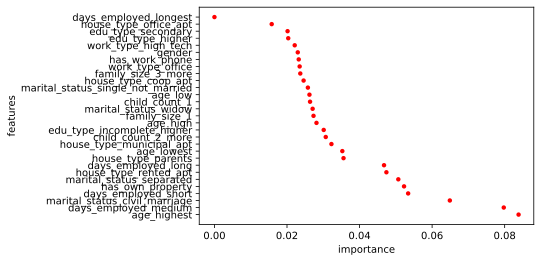

In [59]:
plot_importance(model, X_train, 20)

# Analysis with SHAP

In [60]:
%%capture
!pip install shap
!rm -rf images
!mkdir images

In [61]:
import operator
from collections import defaultdict

import seaborn as sns
import shap

# Configs
shap.initjs()
sns.set_style("whitegrid")

plot_shap = True  # NOTE: Turn False to disable shap plots as they can be slow to load

In [62]:
# Initialize the explainer and apply to test data
explainer = shap.TreeExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
explainer_X_test = explainer(X_test)

100%|===================| 14791/14828 [04:52<00:00]       

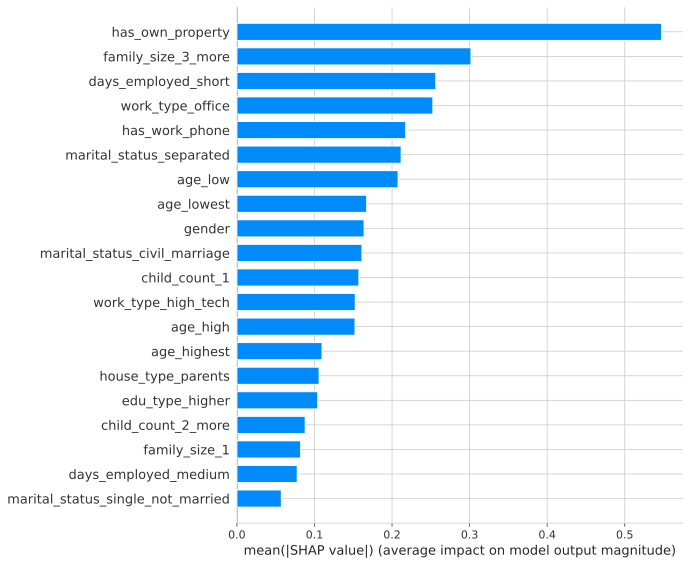

In [63]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("images/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

In [64]:
# Find correctly/incorrectly labeled applicants
index_correct = []
index_incorrect = []

y_test = list(y_test)
y_predict = list(y_predict)

for i in range(len(y_test)):
    if y_test[i] == y_predict[i]:
        index_correct.append(i)
    else:
        index_incorrect.append(i)

print(f"Number of correctly labeled applicants: {len(index_correct)}")
print(f"Number of incorrectly labeled applicants: {len(index_incorrect)}")

Number of correctly labeled applicants: 12951
Number of incorrectly labeled applicants: 1877


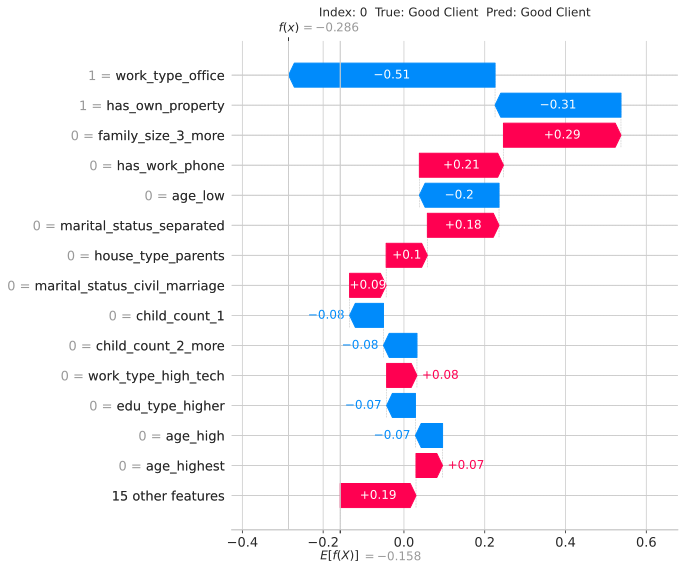

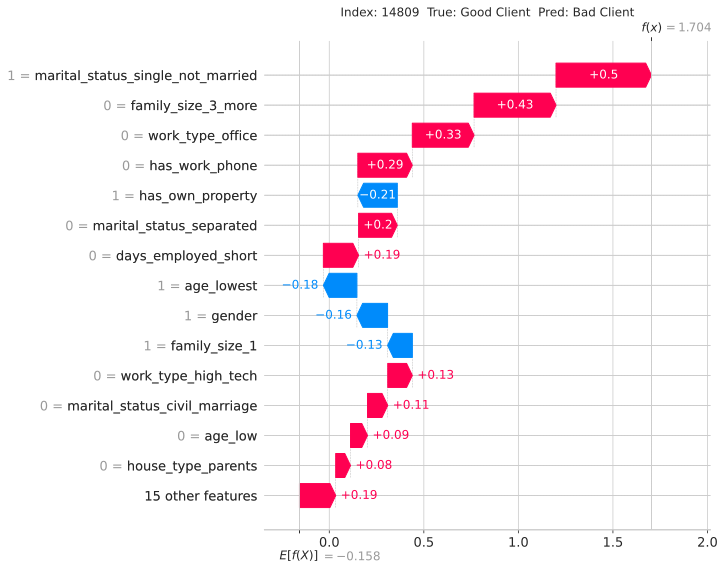

In [65]:
# Visually explain 5 documents selected from the test set
document_idxs = [index_correct[0], index_incorrect[-1]]

for (i, idx) in enumerate(document_idxs):
    doc_explainer = shap.Explanation(base_values=explainer.expected_value, values=shap_values[idx, :], data=explainer_X_test[idx].data, feature_names=list(X_test.columns))
    shap.waterfall_plot(doc_explainer, max_display=15, show=False)
    plt.title(f'Index: {idx}  True: {"Bad Client" if y_test[idx] else "Good Client"}  Pred: {"Bad Client" if y_predict[idx] else "Good Client"}')
    plt.savefig(f"images/explain_{idx}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [66]:
# Identify features that contributed to the misclassification of applicants
true_bad_pred_good_weight = defaultdict(float)
true_good_pred_bad_weight = defaultdict(float)

for i in range(len(y_test)):
    if y_test[i] != y_predict[i]:
        vals = shap_values[i, :]
        feats = X_test.columns

        for feat_i, val_i in zip(feats, vals):
            if val_i > 0 and y_predict[i] == 1:
                true_good_pred_bad_weight[feat_i] += val_i
            elif val_i < 0 and y_predict[i] == 0:
                true_bad_pred_good_weight[feat_i] += val_i

true_bad_pred_good_weight = list(sorted(true_bad_pred_good_weight.items(), key=operator.itemgetter(1)))
true_good_pred_bad_weight = list(sorted(true_good_pred_bad_weight.items(), key=operator.itemgetter(1), reverse=True))

In [67]:
true_bad_pred_good_weight

[('has_own_property', -222.19413702060262),
 ('work_type_office', -120.40417595688176),
 ('family_size_3_more', -120.13531272464965),
 ('age_low', -67.7533493819735),
 ('age_lowest', -61.525562306925906),
 ('child_count_1', -57.98941823208821),
 ('has_work_phone', -54.127138101805045),
 ('days_employed_short', -48.901346319309575),
 ('gender', -45.32609719362126),
 ('age_high', -43.347451348673715),
 ('days_employed_medium', -38.65781080640586),
 ('marital_status_civil_marriage', -36.44545060270526),
 ('edu_type_higher', -33.95307698528083),
 ('work_type_high_tech', -31.88933337941162),
 ('child_count_2_more', -28.68922583977968),
 ('house_type_municipal_apt', -19.803643901416617),
 ('marital_status_single_not_married', -17.84840072330274),
 ('family_size_1', -16.2349525436628),
 ('house_type_parents', -15.643784282429547),
 ('age_highest', -6.786573627325415),
 ('edu_type_incomplete_higher', -5.917496499360707),
 ('house_type_office_apt', -5.577913676286698),
 ('marital_status_widow',

In [68]:
true_good_pred_bad_weight

[('family_size_3_more', 286.9383752814652),
 ('work_type_office', 219.08143050681727),
 ('marital_status_separated', 214.03820657315896),
 ('has_work_phone', 176.02307888679303),
 ('days_employed_short', 135.538880637593),
 ('gender', 120.23867485070552),
 ('work_type_high_tech', 117.86717178661281),
 ('marital_status_civil_marriage', 111.31631180279003),
 ('has_own_property', 95.83605882901357),
 ('age_high', 91.76872174780725),
 ('house_type_parents', 89.06711290652804),
 ('edu_type_higher', 77.38216809482854),
 ('age_highest', 74.8375777888267),
 ('family_size_1', 71.04015437560479),
 ('child_count_1', 68.6327935584055),
 ('age_low', 68.2964038825727),
 ('child_count_2_more', 64.40575575051338),
 ('house_type_rented_apt', 38.91137316818596),
 ('days_employed_medium', 38.42642599862217),
 ('marital_status_single_not_married', 30.49597549314172),
 ('days_employed_long', 28.09900009907631),
 ('house_type_municipal_apt', 25.493509088214136),
 ('house_type_office_apt', 16.190830648398236

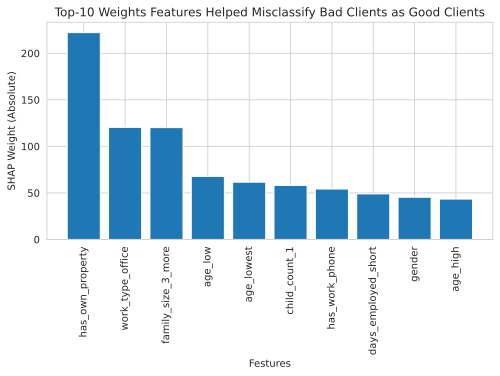

In [73]:
plt.figure(figsize=(8, 4))
plt.bar([item[0] for item in true_bad_pred_good_weight][:10], [abs(item[1]) for item in true_bad_pred_good_weight][:10])
plt.xticks(rotation=90)
plt.title("Top-10 Weights Features Helped Misclassify Bad Clients as Good Clients")
plt.xlabel("Festures")
plt.ylabel("SHAP Weight (Absolute)")
plt.savefig(f"images/bad_as_good.png", dpi=300, bbox_inches="tight")
plt.show()

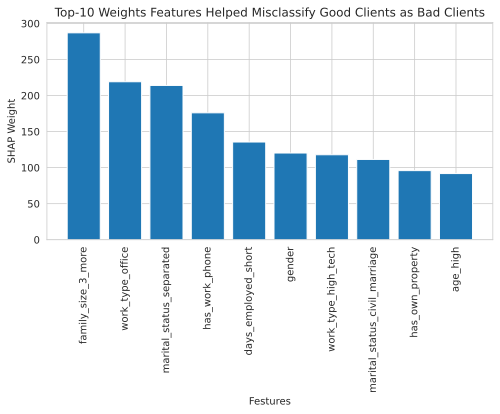

In [74]:
plt.figure(figsize=(8, 4))
plt.bar([item[0] for item in true_good_pred_bad_weight][:10], [abs(item[1]) for item in true_good_pred_bad_weight][:10])
plt.xticks(rotation=90)
plt.title("Top-10 Weights Features Helped Misclassify Good Clients as Bad Clients")
plt.xlabel("Festures")
plt.ylabel("SHAP Weight")
plt.savefig(f"images/good_as_bad.png", dpi=300, bbox_inches="tight")
plt.show()

# Save Output

In [71]:
# Add true label and predicted label to test data
X_test["label_true"] = y_test
X_test["label_pred"] = y_predict
X_test.head()

,gender,has_own_property,child_count_1,child_count_2_more,has_work_phone,age_high,age_highest,age_low,age_lowest,days_employed_long,...,house_type_parents,edu_type_higher,edu_type_incomplete_higher,edu_type_secondary,marital_status_civil_marriage,marital_status_separated,marital_status_single_not_married,marital_status_widow,label_true,label_pred
24205,0,1.0,0.000000,0.0,0,0.0,0.0,0.0,0.00000,0,...,0,0,0,0,0,0,0,0,0,0
39804,0,1.0,0.000000,1.0,0,0.0,0.0,0.0,0.53761,0,...,0,0,0,0,0,0,0,0,1,1
10003,0,1.0,1.000000,0.0,0,0.0,0.0,0.0,0.00000,0,...,0,1,0,0,0,0,0,0,0,0
45484,0,1.0,0.000000,0.0,0,1.0,0.0,0.0,0.00000,0,...,0,0,0,0,0,0,0,0,1,1
25645,1,0.0,0.884236,0.0,1,0.0,0.0,0.0,1.00000,0,...,0,0,0,0,0,0,0,0,1,1


In [72]:
# Save test data as csv
X_test.to_csv("output/output.csv", header=True, index=False)

In [75]:
!zip images.zip images/*.png

  adding: images/bad_as_good.png (deflated 15%)
  adding: images/explain_0.png (deflated 13%)
  adding: images/explain_14809.png (deflated 14%)
  adding: images/feature_importance.png (deflated 19%)
  adding: images/good_as_bad.png (deflated 16%)


## Input and Output

- ### a. Describe the data used by this ADS. How was this data collected or selected?

- The dataset contains two files: an application record file and a credit record file.

    - Specifically, the application record file contains detailed information regarding the credit card applicant, for example, an applicant's sex, birthday, education level, income, etc.
    
    - The credit record file contains detailed information regarding an applicant's loan information for a specific month, for example, if the applicant has paid off their loans for the month and, if not, how many days past due.


- The owner of the dataset did not release information on the source of the dataset and its collection methodology.

- ### b. For each input feature, describe its datatype, give information on missing values and on the value distribution. Show pairwise correlations between features if appropriate. Run any other reasonable profiling of the input that you find interesting and appropriate.

In [1]:
!pip install DataSynthesizer kaggle

In [2]:
import base64

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from DataSynthesizer.lib.utils import pairwise_attributes_mutual_information

In [3]:
# Export Kaggle username and token to the environment
# See https://github.com/Kaggle/kaggle-api for details
%env KAGGLE_USERNAME=larryli86
%env KAGGLE_KEY=9fe3c6ba762f2ef972819bba852af3fa

# Delete files if exist
!rm -rf input credit-card-approval-prediction.zip sample_data

# Download input data
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

# Unzip the input data file into '/content/input'
!unzip /content/credit-card-approval-prediction.zip -d input

env: KAGGLE_USERNAME=larryli86
env: KAGGLE_KEY=9fe3c6ba762f2ef972819bba852af3fa
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 171MB/s]
Archive:  /content/credit-card-approval-prediction.zip
  inflating: input/application_record.csv  
  inflating: input/credit_record.csv  


#### Applicant Dataset

In [4]:
df_applicant = pd.read_csv("input/application_record.csv")
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df_applicant["DIY_AMT_INCOME_TOTAL_FIRST_DIGIT"] = df_applicant["AMT_INCOME_TOTAL"].astype("str").str[0]
df_applicant["DIY_AMT_INCOME_TOTAL_FIRST_DIGIT"] = df_applicant["DIY_AMT_INCOME_TOTAL_FIRST_DIGIT"].astype("int")
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DIY_AMT_INCOME_TOTAL_FIRST_DIGIT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,4
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,4
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,2
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,2


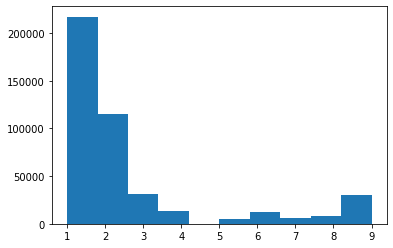

In [6]:
plt.hist(df_applicant["DIY_AMT_INCOME_TOTAL_FIRST_DIGIT"])
plt.show()

In [7]:
df_applicant.dtypes

ID                                    int64
CODE_GENDER                          object
FLAG_OWN_CAR                         object
FLAG_OWN_REALTY                      object
CNT_CHILDREN                          int64
AMT_INCOME_TOTAL                    float64
NAME_INCOME_TYPE                     object
NAME_EDUCATION_TYPE                  object
NAME_FAMILY_STATUS                   object
NAME_HOUSING_TYPE                    object
DAYS_BIRTH                            int64
DAYS_EMPLOYED                         int64
FLAG_MOBIL                            int64
FLAG_WORK_PHONE                       int64
FLAG_PHONE                            int64
FLAG_EMAIL                            int64
OCCUPATION_TYPE                      object
CNT_FAM_MEMBERS                     float64
DIY_AMT_INCOME_TOTAL_FIRST_DIGIT      int64
dtype: object

In [8]:
df_applicant.shape

(438557, 19)

In [9]:
len(df_applicant["ID"].unique())

438510

In [10]:
df_applicant.isnull().sum()

ID                                       0
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
CNT_CHILDREN                             0
AMT_INCOME_TOTAL                         0
NAME_INCOME_TYPE                         0
NAME_EDUCATION_TYPE                      0
NAME_FAMILY_STATUS                       0
NAME_HOUSING_TYPE                        0
DAYS_BIRTH                               0
DAYS_EMPLOYED                            0
FLAG_MOBIL                               0
FLAG_WORK_PHONE                          0
FLAG_PHONE                               0
FLAG_EMAIL                               0
OCCUPATION_TYPE                     134203
CNT_FAM_MEMBERS                          0
DIY_AMT_INCOME_TOTAL_FIRST_DIGIT         0
dtype: int64

In [11]:
df_applicant["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

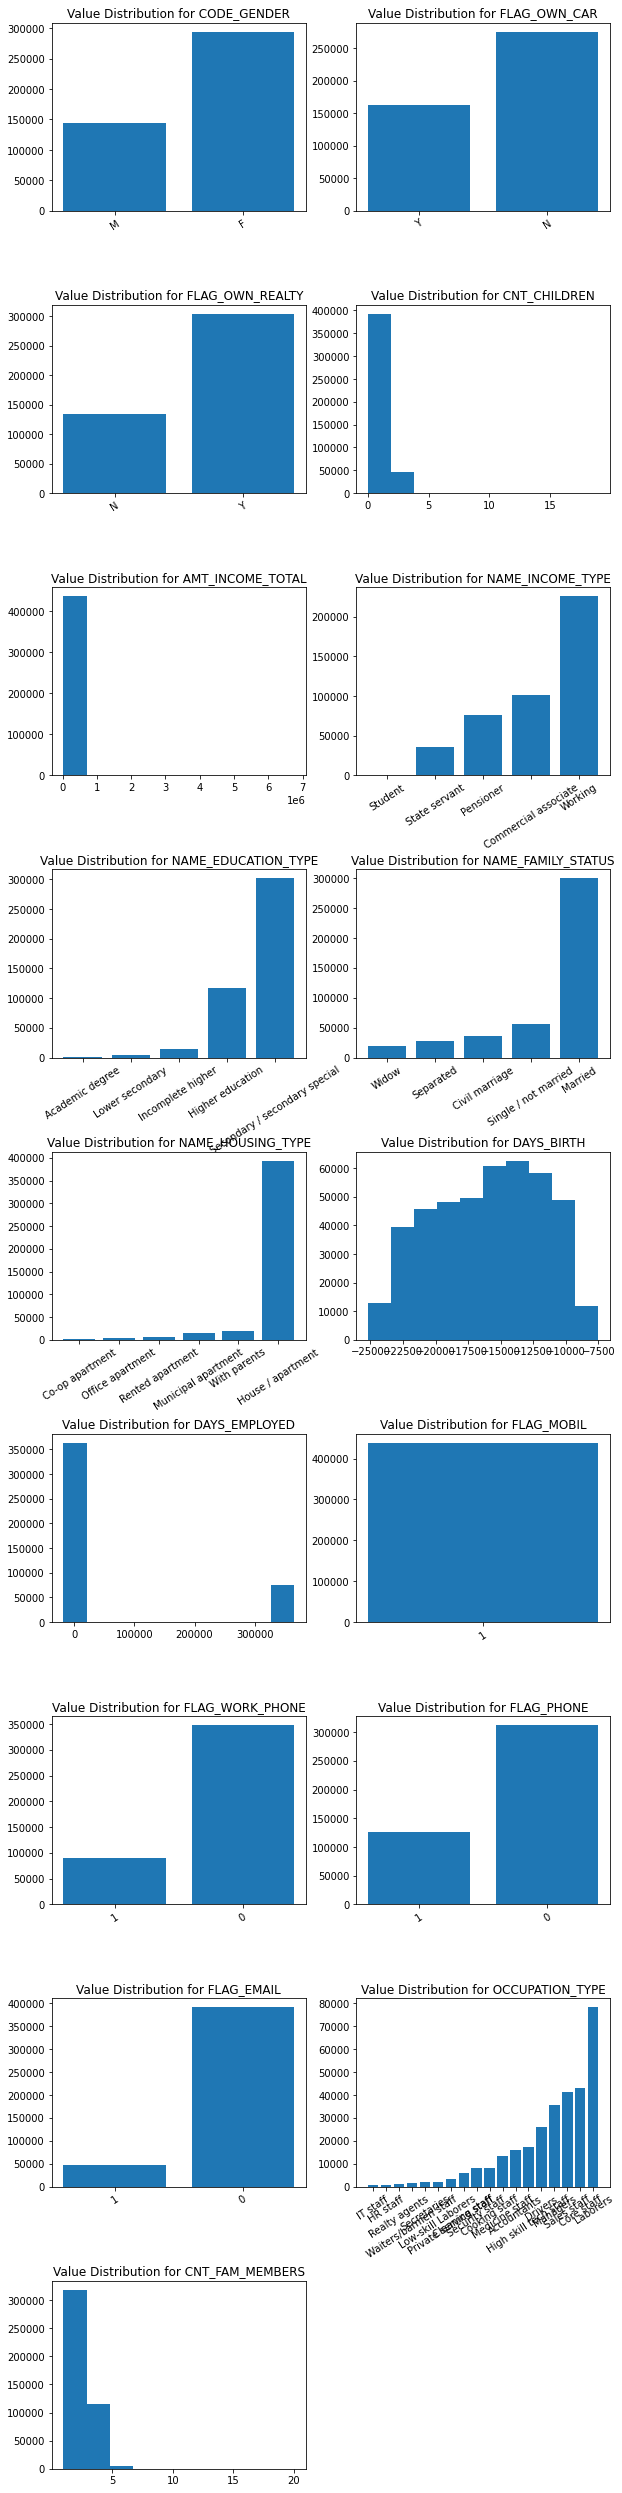

In [12]:
fig, axs = plt.subplots(9, 2, figsize=(10, 45))
plt.subplots_adjust(hspace=0.5)

for (i, column_name) in enumerate(df_applicant.columns):
    if column_name != "ID":
        plt.sca(axs[int((i - 1) / 2), (i - 1) % 2])

        if df_applicant.dtypes[column_name] == object or "FLAG" in column_name:
            plt.bar(df_applicant.groupby(column_name).size().sort_values().index.astype("str"), df_applicant.groupby(column_name).size().sort_values())
            plt.xticks(rotation=33)
        else:
            plt.hist(df_applicant[column_name])

        plt.title(f"Value Distribution for {column_name}")

fig.delaxes(axs[8][1])
plt.show()

#### Credit Dataset

In [13]:
df_credit = pd.read_csv("input/credit_record.csv")
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [14]:
df_credit.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [15]:
df_credit.shape

(1048575, 3)

In [16]:
df_credit.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [17]:
df_credit.groupby("ID").size()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Length: 45985, dtype: int64

In [18]:
df_applicant[~df_applicant["ID"].isin(df_credit["ID"].unique())].shape

(402100, 19)

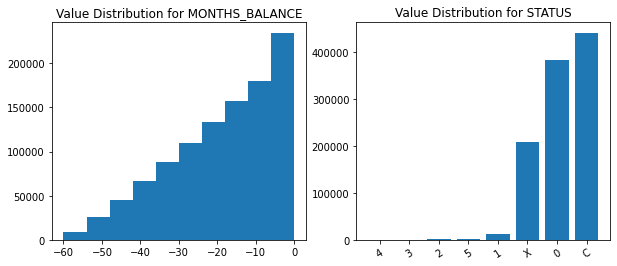

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for (i, column_name) in enumerate(df_credit.columns):
    if column_name != "ID":
        plt.sca(axs[i - 1])

        if df_credit.dtypes[column_name] == object or "FLAG" in column_name:
            plt.bar(df_credit.groupby(column_name).size().sort_values().index.astype("str"), df_credit.groupby(column_name).size().sort_values())
            plt.xticks(rotation=33)
        else:
            plt.hist(df_credit[column_name])

        plt.title(f"Value Distribution for {column_name}")

#### Pairwise Correlations Between Features

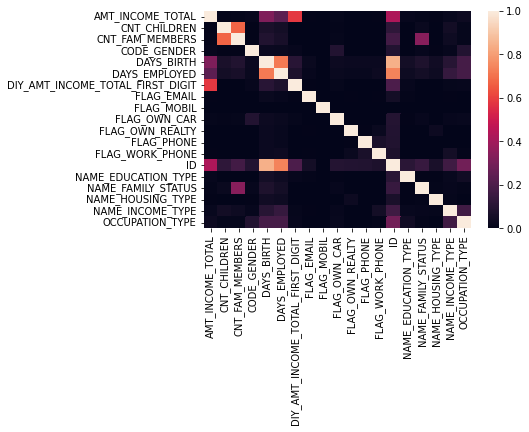

In [20]:
sns.heatmap(pairwise_attributes_mutual_information(df_applicant), vmax=1, vmin=0)
plt.show()

In [1]:
!rm -rf sample_data images tables
!mkdir images tables

# 4. Outcomes

In [2]:
!pip install aif360==0.2.2

In [3]:
import json
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from aif360.datasets import StandardDataset
from aif360.explainers import MetricJSONExplainer, MetricTextExplainer
from aif360.metrics import BinaryLabelDatasetMetric, DatasetMetric
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score

In [4]:
output = pd.read_csv("output/output.csv")

In [5]:
output.columns

Index(['gender', 'has_own_property', 'child_count_1', 'child_count_2_more',
       'has_work_phone', 'age_high', 'age_highest', 'age_low', 'age_lowest',
       'days_employed_long', 'days_employed_longest', 'days_employed_short',
       'days_employed_medium', 'work_type_high_tech', 'work_type_office',
       'family_size_1', 'family_size_3_more', 'house_type_coop_apt',
       'house_type_municipal_apt', 'house_type_office_apt',
       'house_type_rented_apt', 'house_type_parents', 'edu_type_higher',
       'edu_type_incomplete_higher', 'edu_type_secondary',
       'marital_status_civil_marriage', 'marital_status_separated',
       'marital_status_single_not_married', 'marital_status_widow',
       'label_true', 'label_pred'],
      dtype='object')

## a. Analyze the effectiveness (accuracy) of the ADS by comparing its performance across different subpopulations.

### Overall Performance

In [6]:
y_true = output["label_true"]
y_pred = output["label_pred"]

In [7]:
print(len(y_true))

14828


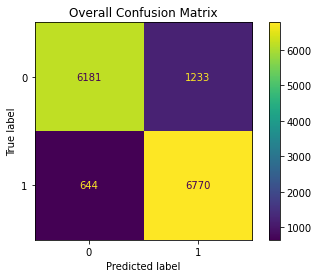

In [8]:
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()
plt.title("Overall Confusion Matrix")
plt.savefig("images/confusion_matrix_overall.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
from IPython.core.pylabtools import figsize


def show_effectiveness(df, column_name, column_label, group_values, group_labels):
    print(f"Performance Based on {column_label}:\n")

    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    accuracy = [accuracy_score(y_true, y_pred)]
    PPV = [precision_score(y_true, y_pred)]
    FPR = [FP / (FP + TN)]
    FNR = [FN / (FN + TP)]

    for i in range(len(group_values)):
        mask = output[column_name] == group_values[i]

        local_y_true = df[mask]["label_true"]
        local_y_pred = df[mask]["label_pred"]

        print(f"Number of {group_labels[i]} Applicants: {len(local_y_true)}")

        local_TN, local_FP, local_FN, local_TP = confusion_matrix(local_y_true, local_y_pred).ravel()

        accuracy.append(accuracy_score(local_y_true, local_y_pred))
        PPV.append(precision_score(local_y_true, local_y_pred))
        FPR.append(local_FP / (local_FP + local_TN))
        FNR.append(local_FN / (local_FN + local_TP))

        ConfusionMatrixDisplay(confusion_matrix(local_y_true, local_y_pred)).plot()
        plt.title(f"Confusion Matrix for\n{group_labels[i]} Applicants")
        plt.savefig(f"images/confusion_matrix_{group_labels[i].lower()}.png", dpi=300, bbox_inches="tight")

    performance_metrics = pd.DataFrame([accuracy, PPV, FPR, FNR], index=["Accuracy", "PPV", "FPR", "FNR"], columns=["Overall", group_labels[0], group_labels[1]])
    print(performance_metrics.round(4))
    return performance_metrics

### Performance Based on Gender

Performance Based on Gender:

Number of Female Applicants: 8975
Number of Male Applicants: 5853
          Overall  Female    Male
Accuracy   0.8734  0.8697  0.8790
PPV        0.8459  0.8460  0.8459
FPR        0.1663  0.1553  0.1844
FNR        0.0869  0.1040  0.0622


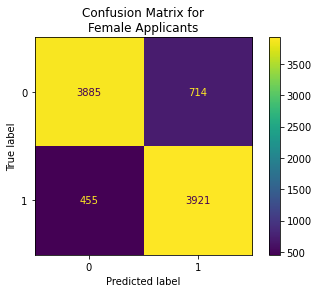

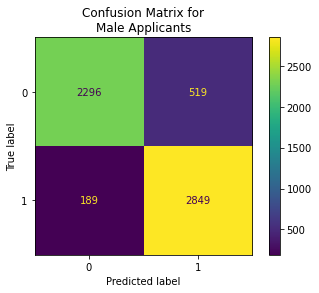

In [10]:
performance_gender = show_effectiveness(df=output, column_name="gender", column_label="Gender", group_values=[0, 1], group_labels=["Female", "Male"])
performance_gender.to_latex("tables/performance_gender.tex")

### Performance Based on Age

Performance Based on Age:

Number of Young Applicants: 2416
Number of Middle Age and Senior Applicants: 11970
          Overall   Young  Middle Age and Senior
Accuracy   0.8734  0.8816                 0.8671
PPV        0.8459  0.8569                 0.8327
FPR        0.1663  0.1577                 0.1680
FNR        0.0869  0.0801                 0.0950


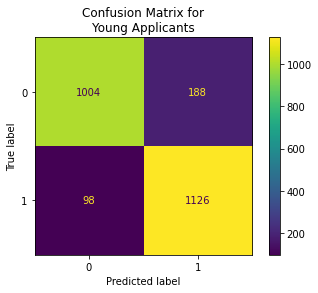

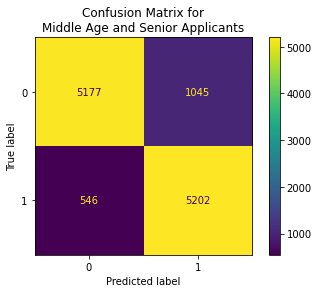

In [11]:
performance_age = show_effectiveness(df=output, column_name="age_lowest", column_label="Age", group_values=[1, 0], group_labels=["Young", "Middle Age and Senior"])
performance_age.to_latex("tables/performance_age.tex")

## b. Select one or several fairness or diversity measures, justify your choice of these measures for the ADS in question, and quantify the fairness or diversity of this ADS.

### Differences in Mean Outcomes

In [12]:
def format_json(json_str):
    return json.dumps(json.loads(json_str, object_pairs_hook=OrderedDict), indent=2)

In [13]:
privileged_gender = [{"gender": 1}]
unprivileged_gender = [{"gender": 0}]

In [14]:
output_aif360_gender = StandardDataset(output, label_name="label_pred", protected_attribute_names=["gender"], privileged_classes=[[1]], favorable_classes=[1])

In [15]:
metric_output_gender = BinaryLabelDatasetMetric(output_aif360_gender, unprivileged_groups=unprivileged_gender, privileged_groups=privileged_gender)
print("Difference in mean outcomes between unprivileged and privileged gender groups = %f" % metric_output_gender.mean_difference())
print(format_json(MetricJSONExplainer(metric_output_gender).mean_difference()))

Difference in mean outcomes between unprivileged and privileged gender groups = -0.058997
{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): -0.05899686230949819",
  "numPositivesUnprivileged": 4635.0,
  "numInstancesUnprivileged": 8975.0,
  "numPositivesPrivileged": 3368.0,
  "numInstancesPrivileged": 5853.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


In [16]:
privileged_age = [{"age_lowest": 0}]
unprivileged_age = [{"age_lowest": 1}]

In [17]:
output_aif360_age = StandardDataset(output, label_name="label_pred", protected_attribute_names=["age_lowest"], privileged_classes=[[0]], favorable_classes=[0])

In [18]:
metric_output_age = BinaryLabelDatasetMetric(output_aif360_age, unprivileged_groups=unprivileged_age, privileged_groups=privileged_age)
print("Difference in mean outcomes between unprivileged and privileged age groups = %f" % metric_output_age.mean_difference())
print(format_json(MetricJSONExplainer(metric_output_age).mean_difference()))

Difference in mean outcomes between unprivileged and privileged age groups = -0.021986
{
  "metric": "Mean Difference",
  "message": "Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): -0.021986118718429593",
  "numPositivesUnprivileged": 1102.0,
  "numInstancesUnprivileged": 2416.0,
  "numPositivesPrivileged": 5723.0,
  "numInstancesPrivileged": 11970.0,
  "description": "Computed as the difference of the rate of favorable outcomes received by the unprivileged group to the privileged group.",
  "ideal": "The ideal value of this metric is 0.0"
}


### Disparate Impact

In [19]:
print(f"Disparate Impact based on gender: {metric_output_gender.disparate_impact()}")
print(format_json(MetricJSONExplainer(metric_output_gender).disparate_impact()))

Disparate Impact based on gender: 0.8974736831658275
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.8974736831658275",
  "numPositivePredictionsUnprivileged": 4635.0,
  "numUnprivileged": 8975.0,
  "numPositivePredictionsPrivileged": 3368.0,
  "numPrivileged": 5853.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


In [20]:
print(f"Disparate Impact based on age: {metric_output_age.disparate_impact()}")
print(format_json(MetricJSONExplainer(metric_output_age).disparate_impact()))

Disparate Impact based on age: 0.9540147053888516
{
  "metric": "Disparate Impact",
  "message": "Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.9540147053888516",
  "numPositivePredictionsUnprivileged": 1102.0,
  "numUnprivileged": 2416.0,
  "numPositivePredictionsPrivileged": 5723.0,
  "numPrivileged": 11970.0,
  "description": "Computed as the ratio of rate of favorable outcome for the unprivileged group to that of the privileged group.",
  "ideal": "The ideal value of this metric is 1.0 A value < 1 implies higher benefit for the privileged group and a value >1 implies a higher benefit for the unprivileged group."
}


### FPR/FNR Imbalance

In [21]:
print(f"FPR imbalance between female and male applicants: {performance_gender.loc['FPR']['Female'] - performance_gender.loc['FPR']['Male']}")
print(f"FNR imbalance between female and male applicants: {performance_gender.loc['FNR']['Female'] - performance_gender.loc['FNR']['Male']}")

FPR imbalance between female and male applicants: -0.02911830782581898
FNR imbalance between female and male applicants: 0.041764252436836034


In [22]:
print(f"FPR imbalance between young and middle-aged/senior applicants: {performance_age.loc['FPR']['Young'] - performance_age.loc['FPR']['Middle Age and Senior']}")
print(f"FNR imbalance between young and middle-aged/senior applicants: {performance_age.loc['FNR']['Young'] - performance_age.loc['FNR']['Middle Age and Senior']}")

FPR imbalance between young and middle-aged/senior applicants: -0.010234306067019167
FNR imbalance between young and middle-aged/senior applicants: -0.014924202109514659


In [25]:
!zip images.zip images/*

  adding: images/confusion_matrix_female.png (deflated 15%)
  adding: images/confusion_matrix_male.png (deflated 15%)
  adding: images/confusion_matrix_middle age and senior.png (deflated 15%)
  adding: images/confusion_matrix_overall.png (deflated 16%)
  adding: images/confusion_matrix_young.png (deflated 15%)
